# Blackjack
- mazzo carte
    - mappare valore della carta su valore numerico e viversa
- mescolare e estrarre
- mostrare carte all'utente
- interazione con l'utente
- gestire l'uscita dal gioco
- gestire il banco
- decidere il vincitore

In [ ]:
x = input('dammi un valore')

In [ ]:
x

## Deck

- carta $\rightarrow$ `tuple`
    - simbolo
    - seme
- mazzo $\rightarrow$ `list`
- valore $\rightarrow$ `dict`
    - corrispondenza fra simbolo e valore

In [ ]:
import blackjack.utils as ut
import blackjack.game as gm
from blackjack.deck import Deck, BJCard

In [ ]:
d1 = Deck(num=2)

In [ ]:
hand = d1.draw(num=1)
hand[0].value

## Blackjack design
- Table
    - Deck
    - list of players
    - dealer
    - ask players actions
    - pay revenue
- Player
 - hand
 - status
 - compute value
- Dealer
 - act
     - hit
     - stay
- HumanPlayer (one or more)
    - capital
    - bet
    - act
        - hit
        - stay
- Deck
    - shuffle
    - draw
    - BJCard
     - symbol, seed
     - value

# Blackjack implementation

In [ ]:
from blackjack.game import Table, HumanPlayer

In [ ]:
table = Table()
p1 = HumanPlayer(name='Player1', capital=100.00, bet_rate=10.00)
p2 = HumanPlayer(name='Player2', capital=100.00, bet_rate=5.00)
table.add_players([p1, p2])

## Receive bets

In [ ]:
table.receive_bets(money=[12.0, 3.0])

In [ ]:
table.bets

## Serve players

In [ ]:
table.serve_players()

In [ ]:
table.dealer.hand, table.dealer.hand_value

In [ ]:
for player in table.players:
    print(player.hand, player.hand_value)

## Play

In [ ]:
table.play()

In [ ]:
table.dealer.hand, table.dealer.hand_value

In [ ]:
for player in table.players:
    print(player.hand, player.hand_value)

## Pay

In [ ]:
table.pay()

In [ ]:
for player in table.players:
    print(player.capital)

In [ ]:
table.history

In [ ]:
p2.history

# Exercise

1. Take a table capital

2. Implement an automatic player with a simple strategy and test it by running multiple episodes and recording the capital

## Automatic play

In [1]:
from blackjack.game import Table, HumanPlayer, DummyAIPlayer, RandomAIPlayer

In [5]:
table = Table()
table.add_players([
    DummyAIPlayer(name='Dummy', capital=100, bet_rate=10),
    RandomAIPlayer(name='Random', capital=100, bet_rate=10)
])

In [6]:
for i in range(20000):
    table.receive_bets()
    table.serve_players()
    table.play()
    table.pay()

In [7]:
for p in table.players:
    print(p.history[-6:])
table.history[-6:]

[800, 810, 810, 820, 830, 820]
[510, 520, 530, 540, 550, 540]


[-1110, -1130, -1140, -1160, -1180, -1160]

### Save in `numpy`

In [11]:
import numpy as np

In [8]:
stats = []
for p in table.players:
    stats.append(p.history)
stats.append(table.history)

In [21]:
S = np.array(stats)

In [22]:
S.shape

(3, 20001)

In [18]:
import matplotlib.pyplot as plt

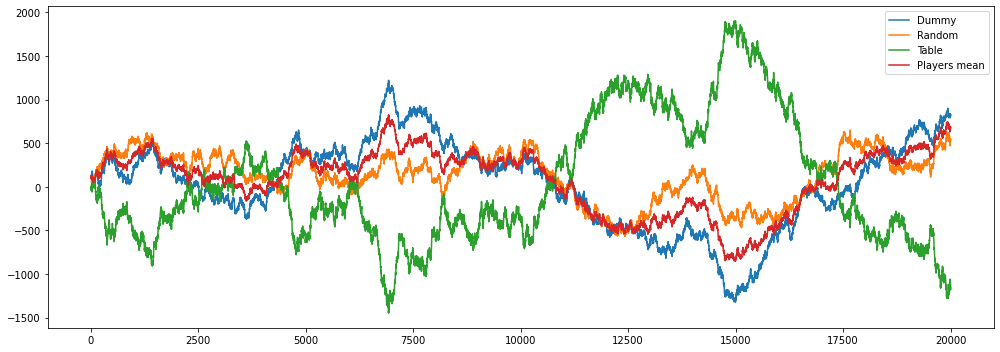

In [27]:
labels = ['Dummy', 'Random', 'Table']
fig, ax = plt.subplots(figsize=(14, 5))
for row in range(S.shape[0]):
    data = S[row,:]
    ax.plot(data, label = labels[row])
ax.plot(S[:2,:].mean(axis=0), label = 'Players mean')
ax.legend()
plt.tight_layout()
plt.show()